In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X = pd.read_csv('load161718.csv', index_col = [0], parse_dates=True)
Ys = X['Load']
#X.index = 

<AxesSubplot:>

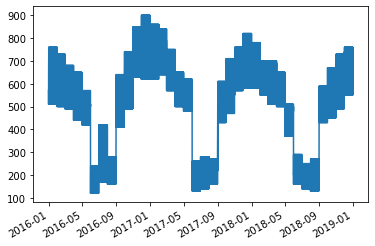

In [4]:
Ys.plot()

In [38]:
features = X[['HOY', 'DOY', 'Month', 'Day', 'Hour']]

In [49]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(features, Ys, test_size=0.35, random_state=0, shuffle=True) #доля тестовой выборки - 25%
#преобразование датафреймов в массивы типа numpy
X_train=X_train0.to_numpy()
y_train=y_train0.to_numpy().reshape(len(y_train0), -1)
X_test=X_test0.to_numpy()
y_test=y_test0.to_numpy().reshape(len(y_test0), -1)
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
#Масштабируем данные
X_train = scaler1.fit_transform(X_train)
y_train=scaler2.fit_transform(y_train)
X_test = scaler1.fit_transform(X_test)
y_test=scaler2.fit_transform(y_test)

scaler1_min = scaler1.min_
scaler1_scale = scaler1.scale_

scaler2_min = scaler2.min_
sacler2_scale = scaler2.scale_

In [40]:
MLP = MLPRegressor(hidden_layer_sizes=(100,100,100),verbose=True, random_state=0)
MLP.fit(X_train, y_train)

C:\Users\Narynbaev\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 1, loss = 0.01968136
Iteration 2, loss = 0.00466654
Iteration 3, loss = 0.00311847
Iteration 4, loss = 0.00252020
Iteration 5, loss = 0.00215726
Iteration 6, loss = 0.00197619
Iteration 7, loss = 0.00196310
Iteration 8, loss = 0.00190745
Iteration 9, loss = 0.00189231
Iteration 10, loss = 0.00189480
Iteration 11, loss = 0.00184956
Iteration 12, loss = 0.00184452
Iteration 13, loss = 0.00182581
Iteration 14, loss = 0.00180534
Iteration 15, loss = 0.00184362
Iteration 16, loss = 0.00178479
Iteration 17, loss = 0.00183669
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(hidden_layer_sizes=(100, 100, 100), random_state=0, verbose=True)

In [43]:
training_metrics=pd.DataFrame(columns=['Входные данные',"R2", "RMSE", "MAE",'MBE','nRMSE','WAPE','MAPE','Максимальная ошибка'])
test_metrics=pd.DataFrame(columns=['Входные данные',"R2", "RMSE", "MAE",'MBE','nRMSE','WAPE','MAPE','Максимальная ошибка'])

#функции расчета ошибок прогнозирования
def nrmse(y_real, y_pred):
    #нормализованная среднеквадратичная ошибка в процентах
    return 100*mean_squared_error(y_real,y_pred,squared=False) / (y_real.mean())
def wape(y_real,y_pred):
    #WEIGHTED ABSOLUTE PERCENT ERROR - взвешенная абсолютная процентная ошибка (MAD mean ratio) - адекватная модификация MAPE 
    return 100*np.abs(y_real-y_pred).sum()/y_real.sum()
def mape(y_real,y_pred):
    return 100*np.abs((y_real-y_pred)/y_real).sum()/y_real.shape[0]
def mbe(y_real,y_pred):
    return (y_pred-y_real).sum()/y_real.shape[0]

def summary (graph,verbose,MLP,X_train,y_train,X_test,y_test): #функция для подведения итога
    prediction=MLP.predict(X_test) #прогнозирование по тестовым признакам
    prediction0=MLP.predict(X_train) #прогнозирование по обучающим признакам
    y_pred0=prediction0.reshape(len(prediction0), -1)
    Ipred=prediction.reshape(len(prediction), -1)
    #на выходе модели выдается масштабированная величина I, которую для лучшей интерпретации результатов необходимо преобразовать обратно в именованную
    ytrain=scaler2.inverse_transform(y_train) #обратное преобразование фактических величин I из обучающей выборки
    y_pred_train=scaler2.inverse_transform(y_pred0) #обратное преобразование спрогнозированных величин I по обучающей выборке
    y_pred=scaler2.inverse_transform(Ipred) #обратное преобразование спрогнозированных величин I 
    y_real=scaler2.inverse_transform(y_test) #обратное преобразование фактических величин I
    if graph==1:    
        p1,p2 = 850,950 #интервалы отображения на графике 
        plt.style.use('seaborn-white')
        plt.figure(figsize=(16, 8))
        plt.grid(axis='y')
        plt.plot(y_pred[p1:p2],'--',label='Прогноз',marker="^")
        plt.plot(y_real[p1:p2],label='Фактические значения',marker="o")
        plt.xlabel('Номер примера',fontsize=16)
        plt.ylabel('Интенсивность солнечной радиации, Вт/кв.м',fontsize=16)
        plt.xticks(fontsize=14), plt.yticks(fontsize=14)
        plt.legend(loc='best', fontsize=14)
        plt.show()
        sns.set(style="darkgrid")
        plt.figure(figsize=(10,10))
#         grid=sns.jointplot(y_pred,y_real,kind="reg") #fit_reg=True, scatter_kws={"s": 50})
#         g=grid.annotate(pearsonr,fontsize=15)
#         plt.xlabel('Спрогнозированная интенсивность \nсолнечной радиации, Вт/кв.м.',fontsize=15)
#         plt.ylabel('Фактическая интенсивность \nсолнечной радиации, Вт/кв.м.',fontsize=15) #°C
#         plt.xticks(fontsize=15), plt.yticks(fontsize=15)
#         grid.fig.set_figwidth(7)
#         grid.fig.set_figheight(7)
#         #grid.savefig("nvchbcos(inc)corr.png", dpi=300, transparent=False)
        plt.show()
    if verbose==1:
        print('Модель: ', MLP)
        print('Обучающая выборка:')
        print('Коэффициент детерминации R^2:', round(r2_score(ytrain,y_pred_train),3))
        print('MAE:', round(mean_absolute_error(ytrain,y_pred_train),2),'Вт/кв.м')
        print('RMSE:', round(mean_squared_error(ytrain,y_pred_train,squared=False),2),'Вт/кв.м')
        print('nRMSE:', round(nrmse(ytrain,y_pred_train),2),'%')
        print('WAPE:', round(wape(ytrain,y_pred_train),2), '%')
        print('MAPE:', round(mape(ytrain,y_pred_train),2), '%')
        print('MBE:', round(mbe(ytrain,y_pred_train),2), 'Вт/кв.м')
        print('Максимальная ошибка:', round(max_error(ytrain,y_pred_train),2), 'Вт/кв.м')
        print()
        print('Тестовая выборка:')
        print('Коэффициент детерминации R^2:', round(r2_score(y_real,y_pred),3))
        print('MAE:', round(mean_absolute_error(y_real,y_pred),2),'Вт/кв.м')
        print('RMSE:', round(mean_squared_error(y_real,y_pred,squared=False),2),'Вт/кв.м')
        print('nRMSE:', round(nrmse(y_real,y_pred),2),'%')
        print('WAPE:', round(wape(y_real,y_pred),2), '%')
        print('MAPE:', round(mape(y_real,y_pred),2), '%')
        print('MBE:', round(mbe(y_real,y_pred),2), 'Вт/кв.м')
        print('Максимальная ошибка:', round(max_error(y_real,y_pred),2), 'Вт/кв.м')
    tr=np.array([round(r2_score(ytrain,y_pred_train),3),round(mean_absolute_error(ytrain,y_pred_train),2),
                round(mean_squared_error(ytrain,y_pred_train,squared=False),2),round(nrmse(ytrain,y_pred_train),2),
                round(wape(ytrain,y_pred_train),2),round(mbe(ytrain,y_pred_train),2), round(mape(ytrain,y_pred_train),2),
                round(max_error(ytrain,y_pred_train),2)])
    te=np.array([round(r2_score(y_real,y_pred),3),round(mean_absolute_error(y_real,y_pred),2),
                round(mean_squared_error(y_real,y_pred,squared=False),2),round(nrmse(y_real,y_pred),2),
                round(wape(y_real,y_pred),2),round(mbe(y_real,y_pred),2),round(mape(y_real,y_pred),2), 
                round(max_error(y_real,y_pred),2)])
    return tr,te

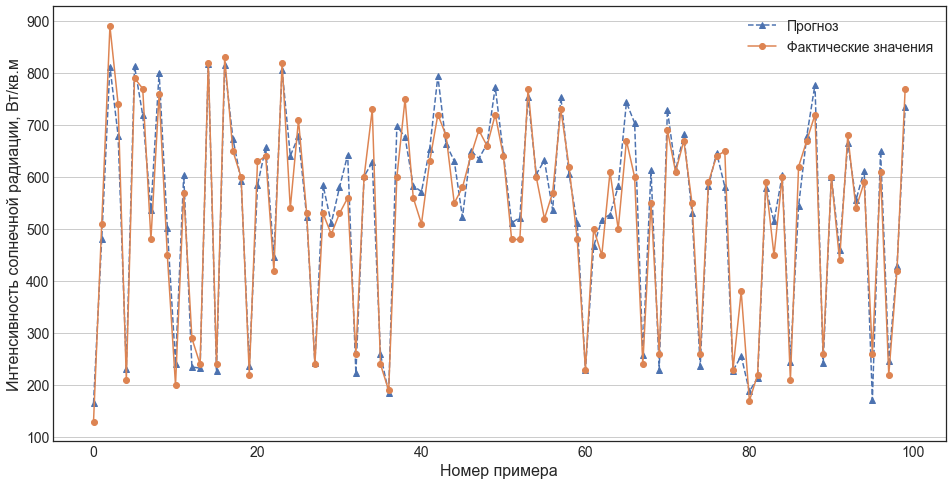

<Figure size 720x720 with 0 Axes>

Модель:  MLPRegressor(hidden_layer_sizes=(100, 100, 100), random_state=0, verbose=True)
Обучающая выборка:
Коэффициент детерминации R^2: 0.941
MAE: 37.08 Вт/кв.м
RMSE: 47.81 Вт/кв.м
nRMSE: 9.28 %
WAPE: 7.2 %
MAPE: 7.94 %
MBE: 10.09 Вт/кв.м
Максимальная ошибка: 180.72 Вт/кв.м

Тестовая выборка:
Коэффициент детерминации R^2: 0.94
MAE: 37.32 Вт/кв.м
RMSE: 48.02 Вт/кв.м
nRMSE: 9.35 %
WAPE: 7.27 %
MAPE: 8.02 %
MBE: 11.08 Вт/кв.м
Максимальная ошибка: 181.67 Вт/кв.м


(array([  0.941,  37.08 ,  47.81 ,   9.28 ,   7.2  ,  10.09 ,   7.94 ,
        180.72 ]),
 array([  0.94,  37.32,  48.02,   9.35,   7.27,  11.08,   8.02, 181.67]))

In [44]:
summary(1, 1, MLP, X_train,y_train,X_test,y_test)

<ipython-input-47-668408487b54>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  MLP.predict(features['2016-02-02'])


array([81.56743467, 81.93521438, 82.30299409, 82.6707738 , 83.03855351,
       83.40633322, 83.77411293, 84.14355004, 84.51532963, 84.88710922,
       85.25888881, 85.63066839, 86.00244798, 86.37422757, 86.74600716,
       87.11778675, 87.49249956, 87.86810555, 88.24371154, 88.61931752,
       88.99492351, 89.37052949, 89.74613548, 90.12174146])

In [46]:
features['2016-02-02']

<ipython-input-46-29804c94743c>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  features['2016-02-02']


,HOY,DOY,Month,Day,Hour
2016-02-02 00:00:00,769,33,2,2,1
2016-02-02 01:00:00,770,33,2,2,2
2016-02-02 02:00:00,771,33,2,2,3
2016-02-02 03:00:00,772,33,2,2,4
2016-02-02 04:00:00,773,33,2,2,5
2016-02-02 05:00:00,774,33,2,2,6
2016-02-02 06:00:00,775,33,2,2,7
2016-02-02 07:00:00,776,33,2,2,8
2016-02-02 08:00:00,777,33,2,2,9
2016-02-02 09:00:00,778,33,2,2,10


In [76]:
ft = scaler1.transform(features['2017-08-02'])
yt = scaler2.transform((Ys['2017-08-02']).to_numpy().reshape(len(Ys['2017-08-02']), -1))

<ipython-input-76-d63723e23837>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ft = scaler1.transform(features['2017-08-02'])


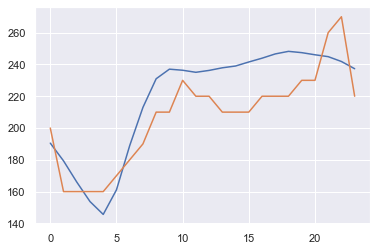

In [77]:
plt.plot(scaler2.inverse_transform(MLP.predict(ft).reshape(len(MLP.predict(ft)), -1)))
plt.plot(np.array(Ys['2017-08-02']))